In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate Recency, Frequency, and Monetary values
current_date = df['Order Date'].max()  # Assuming today's date is the maximum order date

rfm_data = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
})

# Use pd.qcut to create bins for scoring
rfm_data['Recency_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=False)
rfm_data['Frequency_Score'] = pd.qcut(rfm_data['Frequency'], q=4, labels=False)
rfm_data['Monetary_Score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=False)

# Calculate the overall RFM score
rfm_data['RFM_Score'] = rfm_data['Recency_Score'] + rfm_data['Frequency_Score'] + rfm_data['Monetary_Score']

# Display the RFM analysis results
print(rfm_data.head())

ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

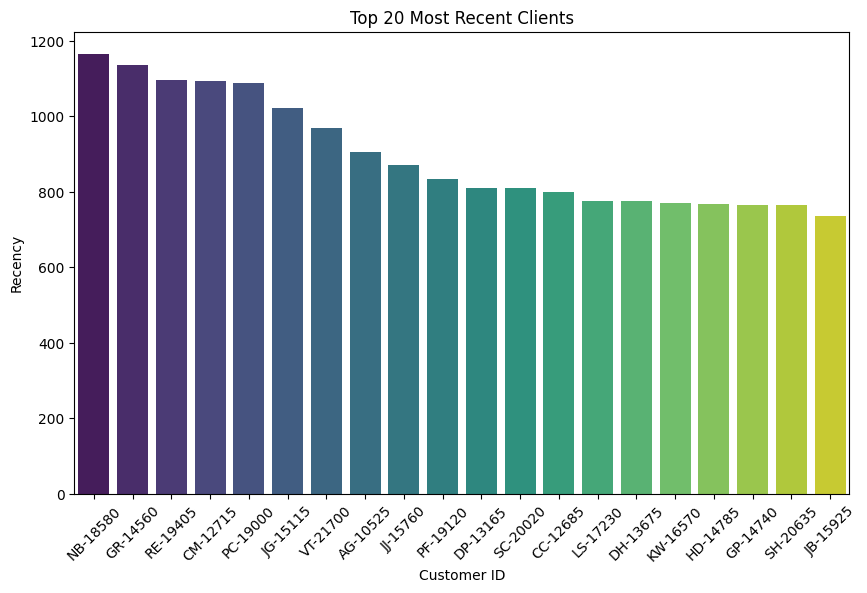

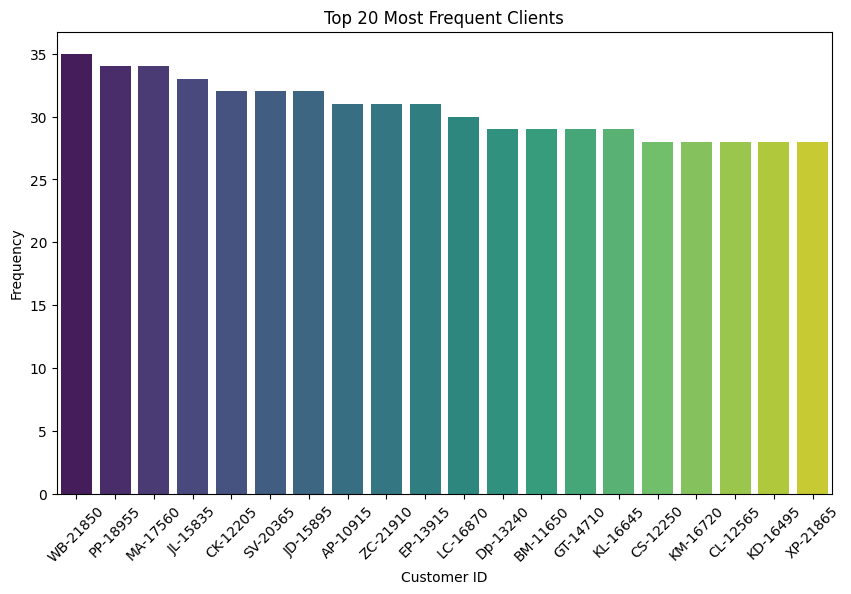

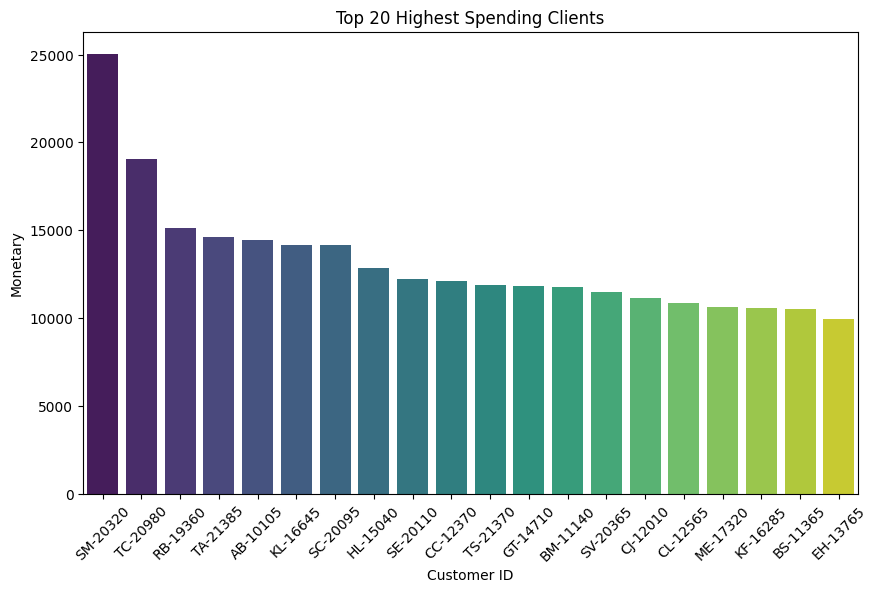

In [ ]:
# Sort the DataFrame by Recency in descending order
top_recency_clients = rfm_data.sort_values(by='Recency', ascending=False).head(20)

# Plot the Recency values for the top 20 clients
plt.figure(figsize=(10, 6))
sns.barplot(x=top_recency_clients.index, y='Recency', data=top_recency_clients, hue=top_recency_clients.index, palette='viridis', legend=False)
plt.title('Top 20 Most Recent Clients')
plt.xlabel('Customer ID')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.show()

top_frequency_clients = rfm_data.sort_values(by='Frequency', ascending=False).head(20)

# Plot the Frequency values for the top 20 clients
plt.figure(figsize=(10, 6))
sns.barplot(x=top_frequency_clients.index, y='Frequency', data=top_frequency_clients, hue=top_frequency_clients.index, palette='viridis', legend=False)
plt.title('Top 20 Most Frequent Clients')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

top_monetary_clients = rfm_data.sort_values(by='Monetary', ascending=False).head(20)

# Plot the Monetary values for the top 20 clients
plt.figure(figsize=(10, 6))
sns.barplot(x=top_monetary_clients.index, y='Monetary', data=top_monetary_clients, hue=top_monetary_clients.index, palette='viridis', legend=False)
plt.title('Top 20 Highest Spending Clients')
plt.xlabel('Customer ID')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.show()

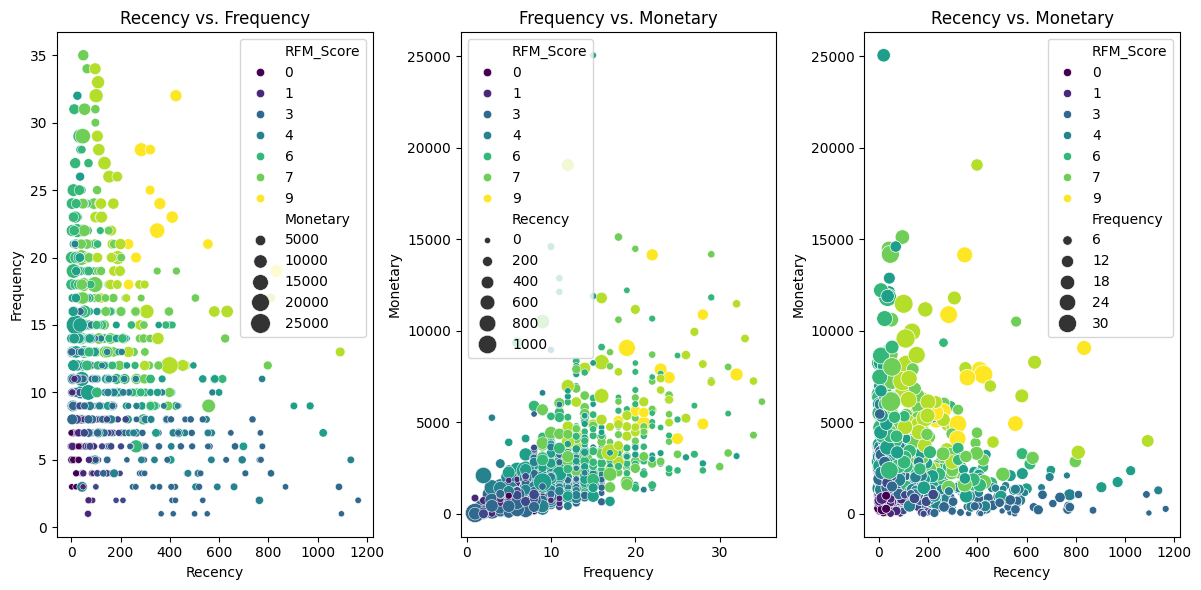

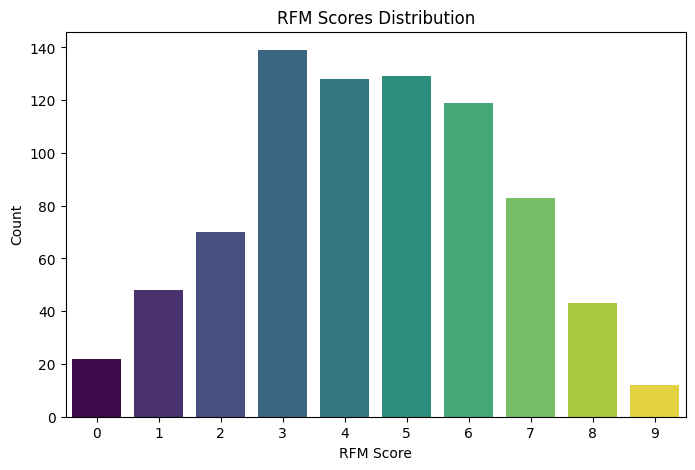

In [ ]:
# Scatter plot for Recency vs. Frequency
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.scatterplot(x='Recency', y='Frequency', data=rfm_data, hue='RFM_Score', palette='viridis', size='Monetary', sizes=(20, 200))
plt.title('Recency vs. Frequency')

# Scatter plot for Frequency vs. Monetary
plt.subplot(132)
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_data, hue='RFM_Score', palette='viridis', size='Recency', sizes=(20, 200))
plt.title('Frequency vs. Monetary')

# Scatter plot for Recency vs. Monetary
plt.subplot(133)
sns.scatterplot(x='Recency', y='Monetary', data=rfm_data, hue='RFM_Score', palette='viridis', size='Frequency', sizes=(20, 200))
plt.title('Recency vs. Monetary')

plt.tight_layout()
plt.show()

# Bar plot for RFM scores distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RFM_Score', hue='RFM_Score', data=rfm_data, palette='viridis', legend=False)
plt.title('RFM Scores Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()

In [5]:
from faker import Faker
import random

# Seed for reproducibility
random.seed(42)

# Create a Faker instance
faker = Faker()

# Generate synthetic data
num_records = 1000

data = {
    'CustomerID': [faker.uuid4() for _ in range(num_records)],
    'Country': [faker.country() for _ in range(num_records)],
    'InvoiceDate': [faker.date_this_decade() for _ in range(num_records)],
    'Quantity': [random.randint(1, 100) for _ in range(num_records)],
    'UnitPrice': [random.uniform(1, 100) for _ in range(num_records)]
}

df = pd.DataFrame(data)

# Display the first few rows of the synthetic dataset
print(df.head())

                             CustomerID                            Country  \
0  de326465-cb8a-44e9-87a3-c7f06c04f4ad                            Lesotho   
1  7d5c39b8-eb35-486a-92b9-95f2f64604e5                       Saint Helena   
2  e08bbfe4-3b76-4a45-a0e7-471a5188cbab               Netherlands Antilles   
3  30a1f03f-8891-40de-a230-7ec8a950826b         Slovakia (Slovak Republic)   
4  11f83349-0420-47b3-bd7f-9160c34f3ca5  Heard Island and McDonald Islands   

  InvoiceDate  Quantity  UnitPrice  
0  2020-04-01        82  18.764713  
1  2021-12-20        15   2.400688  
2  2022-01-07         4  53.879374  
3  2020-05-20        95  28.156821  
4  2021-02-07        36  97.455198  
